In [9]:
# Our usual imports
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import geopandas as gpd


# This will add the .hvplot() function to your DataFrame!
import hvplot.pandas

# Import holoviews too
import holoviews as hv



# looks like maybe the stops are wrong
checking the list of all north and center stops. these are without the bboading and alighting data 

In [2]:
allnorth_stops = pd.read_csv(r'.\data\allnorth_stops.csv')


In [3]:
# Create the Point() objects
allnorth_stops['geometry'] = gpd.points_from_xy(allnorth_stops['stop_lon'], allnorth_stops['stop_lat'])

# Create the GeoDataFrame
allnorth_stops = gpd.GeoDataFrame(allnorth_stops, geometry='geometry', crs="EPSG:4326")

In [4]:
central_stops = pd.read_csv(r'.\data\central_stops.csv')

In [5]:
# Create the Point() objects
central_stops['geometry'] = gpd.points_from_xy(central_stops['stop_lon'], central_stops['stop_lat'])

# Create the GeoDataFrame
central_stops = gpd.GeoDataFrame(central_stops, geometry='geometry', crs="EPSG:4326")

In [13]:

# Load the city limits from open data philly
city_limits = gpd.read_file(
    "https://opendata.arcgis.com/datasets/405ec3da942d4e20869d4e1449a2be48_0.geojson"
).to_crs(epsg=3857)



NameError: name 'ctx' is not defined

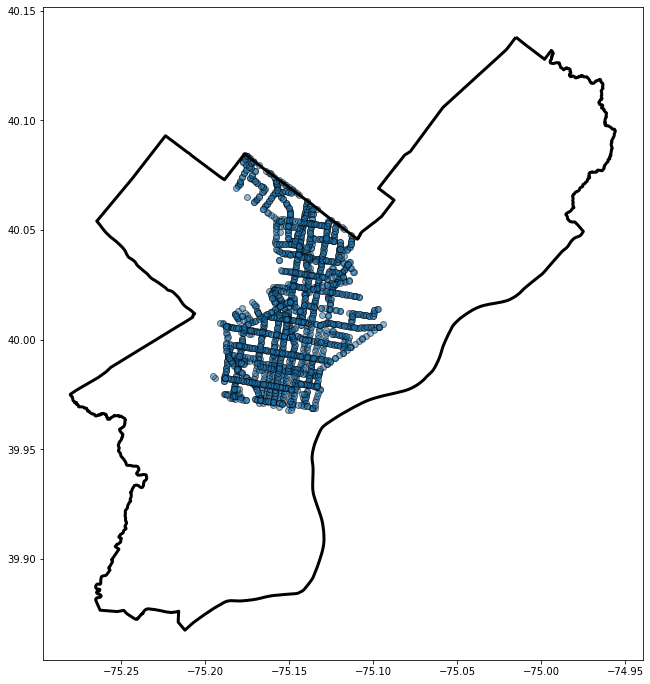

In [14]:
ax = allnorth_stops.plot( 
                     figsize=(12, 12),
                     legend=True,
                     alpha=0.5,
                     edgecolor='k')
# Add the city limits (with the same CRS!)
city_limits = city_limits.to_crs(allnorth_stops.crs)
city_limits.plot(
    ax=ax, edgecolor="black", linewidth=3, facecolor="none"
)

# Plot the basemap underneath
ctx.add_basemap(ax=ax, crs=allnorth_stops.crs, source=ctx.providers.CartoDB.Positron)

ax.set_axis_off()

ax.set(title="All North Stops")

[Text(0.5, 1.0, 'All Center Stops')]

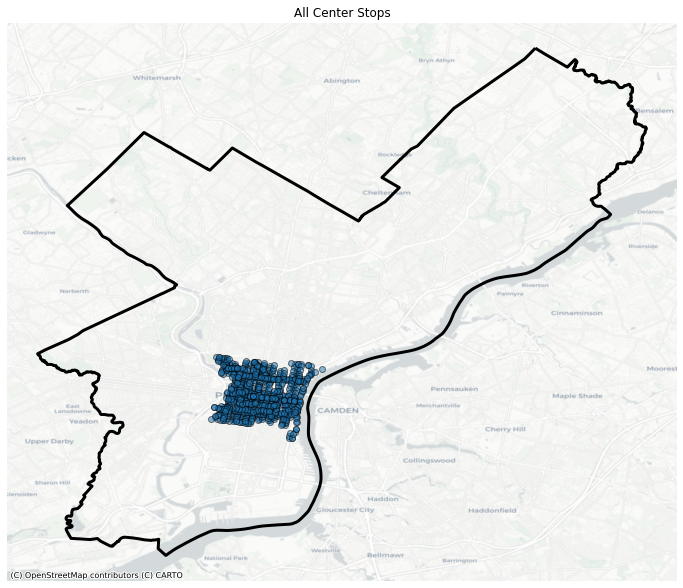

In [ ]:
ax = central_stops.plot( 
                     figsize=(12, 12),
                     legend=True,
                     alpha=0.5,
                     edgecolor='k')
# Add the city limits (with the same CRS!)
city_limits = city_limits.to_crs(central_stops.crs)
city_limits.plot(
    ax=ax, edgecolor="black", linewidth=3, facecolor="none"
)

# Plot the basemap underneath
ctx.add_basemap(ax=ax, crs=allnorth_stops.crs, source=ctx.providers.CartoDB.Positron)

ax.set_axis_off()

ax.set(title="All Center Stops")

## so it doesn't look like it's the stop  lists
maybe it's the merge with septa data that messed it up?

In [ ]:
len(allnorthsepta)

571069

In [ ]:
len(allnorth_stops)

1944

In [15]:
allnorthsepta = pd.read_csv(r'.\do_not_push\allallnorth_stops_geom.csv')

C:\Users\brine\miniconda3\envs\550reclone\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (0,23,26,27) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
allnorthsepta.head()

,Route,Direction,Pattern,Trip,Trip Code,Trip Type,Stop Code,StopSeq,Avg. Ons,Avg. Offs,...,Run Dev,Row,stop_namestop_name,stop_id,stop_namecleanstop_name,stop_lat,stop_lon,the_geom,cleanstop_name,geometry
0,1,Northbound,N08,[05:13] 8548782,8548782,Revenue,4st,(001) - Roosevelt Blvd & Broad St - FS,9.696970,0.0,...,00:00:44,NaN,RooseveltBlvdBroadStFS,19.0,Roosevelt Blvd & Comly Rd,40.105172,-75.001575,0101000020E6100000705F07CE19C052C03B3AAE46760D...,RooseveltBlvdComlyRd,POINT (-75.00158 40.10517)
1,1,Northbound,N08,[05:13] 8670224,8670224,Revenue,4st,(001) - Roosevelt Blvd & Broad St - FS,9.000000,0.0,...,00:00:08,1.0,RooseveltBlvdBroadStFS,19.0,Roosevelt Blvd & Comly Rd,40.105172,-75.001575,0101000020E6100000705F07CE19C052C03B3AAE46760D...,RooseveltBlvdComlyRd,POINT (-75.00158 40.10517)
2,1,Northbound,N08,[05:13] 8548782,8548782,Revenue,22406st,(002) - Roosevelt Blvd & 9th St,2.303030,0.0,...,00:00:11,NaN,RooseveltBlvdthSt,21.0,Roosevelt Blvd & Solly Av - FS,40.058873,-75.045067,0101000020E61000003FC8B260E2C252C007CF84268907...,RooseveltBlvdSollyAvFS,POINT (-75.04507 40.05887)
3,1,Northbound,N08,[05:13] 8670224,8670224,Revenue,22406st,(002) - Roosevelt Blvd & 9th St,2.235294,0.0,...,00:00:14,2.0,RooseveltBlvdthSt,21.0,Roosevelt Blvd & Solly Av - FS,40.058873,-75.045067,0101000020E61000003FC8B260E2C252C007CF84268907...,RooseveltBlvdSollyAvFS,POINT (-75.04507 40.05887)
4,1,Northbound,N08,[05:13] 8548782,8548782,Revenue,23308st,(003) - Roosevelt Blvd & Wyoming Av,0.000000,0.0,...,00:00:04,NaN,RooseveltBlvdWyomingAv,22.0,Roosevelt Blvd & Cottman Av,40.044862,-75.054530,0101000020E6100000A8A9656B7DC352C0A56ABB09BE05...,RooseveltBlvdCottmanAv,POINT (-75.05453 40.04486)


In [ ]:
allnorthsepta.groupby(by="")

In [ ]:
# Create the Point() objects
allnorthsepta['geometry'] = gpd.points_from_xy(allnorthsepta['stop_lon'], allnorthsepta['stop_lat'])

# Create the GeoDataFrame
allnorthsepta = gpd.GeoDataFrame(allnorthsepta, geometry='geometry', crs="EPSG:4326")

[Text(0.5, 1.0, 'All North Stops')]

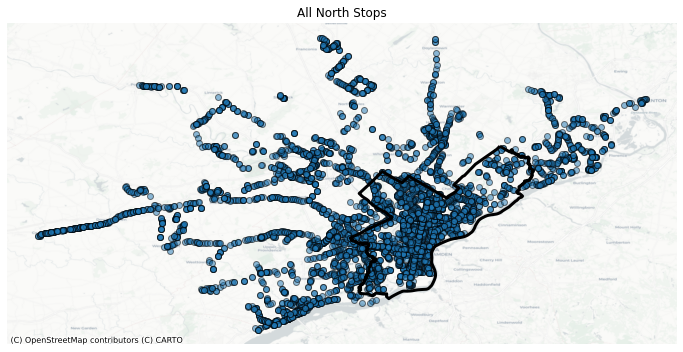

In [ ]:
ax = allnorthsepta.plot( 
                     figsize=(12, 12),
                     legend=True,
                     alpha=0.5,
                     edgecolor='k')
# Add the city limits (with the same CRS!)
city_limits = city_limits.to_crs(allnorthsepta.crs)
city_limits.plot(
    ax=ax, edgecolor="black", linewidth=3, facecolor="none"
)

# Plot the basemap underneath
ctx.add_basemap(ax=ax, crs=allnorthsepta.crs, source=ctx.providers.CartoDB.Positron)

ax.set_axis_off()

ax.set(title="All North Stops")

In [16]:
CitywideStopStats = pd.read_csv(r'.\data\summarystats\CityWideStopStats.csv')

In [17]:
BGEStopStats = pd.read_csv(r'.\data\summarystats\BGEStopStats.csv')


In [18]:
CitywideStopStats.head()

,stop_namecleanstop_name,Total Avg. Ons,Total Avg. Offs,Overall Mean Avg. Ons,Overall Mean Avg. Offs,stop_lat,stop_lon
0,10 Campus Blvd - FS,0.111111,0.000000,0.055556,0.000000,39.976832,-75.416319
1,1000 Tinicum Island Rd,0.181818,1.113636,0.090909,0.556818,39.870136,-75.270830
2,1000 Tinicum Island Rd - MBNS,0.294118,0.000000,0.147059,0.000000,39.871082,-75.271347
3,10th & Main St,0.333333,0.100000,0.166667,0.050000,40.193253,-75.529552
4,10th Av & Church St,0.400000,2.066667,0.200000,1.033333,40.194020,-75.530418


In [ ]:
#  make geoms

In [19]:
# Create the Point() objects
CitywideStopStats['geometry'] = gpd.points_from_xy(CitywideStopStats['stop_lon'], CitywideStopStats['stop_lat'])

# Create the GeoDataFrame
CitywideStopStats = gpd.GeoDataFrame(CitywideStopStats, geometry='geometry', crs="EPSG:4326")

In [20]:


# make sure we remove missing geometries
CitywideStopStats = CitywideStopStats.dropna(subset=['geometry'])

# convert to a better CRS
CitywideStopStats = CitywideStopStats.to_crs(epsg=3857)



In [21]:
CitywideStopStats = gpd.sjoin(CitywideStopStats, city_limits, op='within', how='inner')

C:\Users\brine\AppData\Local\Temp/ipykernel_14772/2610435825.py:1: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:3857
Right CRS: EPSG:4326

  CitywideStopStats = gpd.sjoin(CitywideStopStats, city_limits, op='within', how='inner')


In [ ]:
len(CitywideStopStats)

6595

In [22]:


import contextily as ctx



C:\Users\brine\miniconda3\envs\550reclone\lib\site-packages\geopandas\plotting.py:678: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(
C:\Users\brine\miniconda3\envs\550reclone\lib\site-packages\contextily\tile.py:632: UserWarning: The inferred zoom level of 27 is not valid for the current tile provider (valid zooms: 0 - 19).
  warnings.warn(msg)


[Text(0.5, 1.0, 'City Wide Stops - Avg Ons.')]

<Figure size 432x288 with 0 Axes>

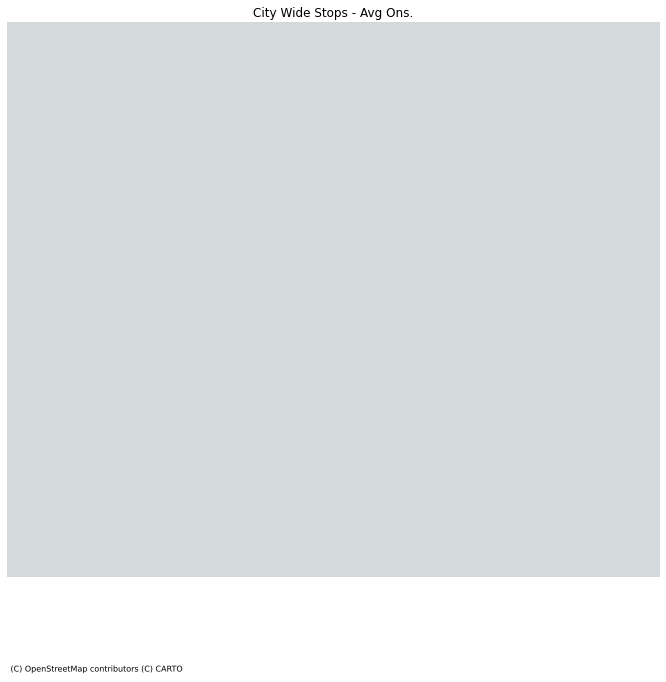

In [23]:

CitywideStopStats = CitywideStopStats.to_crs("EPSG:3857")

# Add the city limits (with the same CRS!)
city_limits = city_limits.to_crs(CitywideStopStats.crs)
city_limits.plot(
    ax=ax, edgecolor="black", linewidth=3, facecolor="none"
)




ax = CitywideStopStats.plot( 
                     column="Total Avg. Ons",
                     figsize=(12, 12),
                     legend=True,
                     alpha=0.5,
                     edgecolor='k',
                     cmap='BuPu',
                     scheme='QUANTILES',
                     legend_kwds={'loc': 'center left', 'bbox_to_anchor':(1,0.5)})


# Plot the basemap underneath
ctx.add_basemap(ax=ax, crs=CitywideStopStats.crs, source=ctx.providers.CartoDB.Positron)

ax.set_axis_off()

ax.set(title="City Wide Stops - Avg Ons.")

In [24]:
CitywideStopStats['x'] = CitywideStopStats.geometry.x
CitywideStopStats['y'] = CitywideStopStats.geometry.y
subdata = CitywideStopStats[['x', 'y', 'Total Avg. Ons', 'stop_namecleanstop_name']]

In [25]:
CitywideStopStats = CitywideStopStats.to_crs("EPSG:3857")

# Add the city limits (with the same CRS!)
city_limits = city_limits.to_crs(CitywideStopStats.crs)

In [34]:
CitywideStopStats.head()

,stop_namecleanstop_name,Total Avg. Ons,Total Avg. Offs,Overall Mean Avg. Ons,Overall Mean Avg. Offs,stop_lat,stop_lon,geometry,index_right,OBJECTID,Shape__Area,Shape__Length,x,y


In [ ]:
subdata = CitywideStopStats[[""]]

In [29]:
hexb = subdata.hvplot.hexbin(x='x', 
                      y='y', 
                      C='Total Avg. Ons',
                      geo=True,
                     crs='EPSG:3857',
                      gridsize=40,
                      cmap='viridis',
                            hover_cols = ["stop_namecleanstop_name"],)

In [27]:
city = city_limits.hvplot(geo=True, crs='EPSG:3857', alpha= .5, line_color="black", color="NULL", line_width=2
)


In [ ]:
city

:Polygons   [Longitude,Latitude]

In [28]:
city*hexb

:Overlay
   .Polygons.I :Polygons   [Longitude,Latitude]
   .HexTiles.I :HexTiles   [x,y]   (Total Avg. Ons,stop_namecleanstop_name)

In [32]:
ThreeStopStats = pd.read_csv(r'.\data\summarystats\StopStatsSummary.csv')

In [33]:
# Create the Point() objects
ThreeStopStats['geometry'] = gpd.points_from_xy(ThreeStopStats['stop_lon'], ThreeStopStats['stop_lat'])

# Create the GeoDataFrame
ThreeStopStats = gpd.GeoDataFrame(ThreeStopStats, geometry='geometry', crs="EPSG:4326")

<AxesSubplot:>

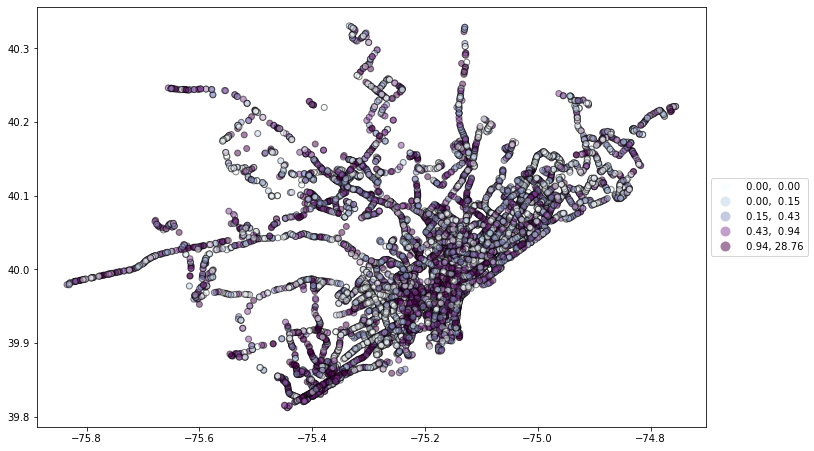

In [35]:
ThreeStopStats.plot(column="Total Avg. Ons",
                     figsize=(12, 12),
                     legend=True,
                     alpha=0.5,
                     edgecolor='k',
                     cmap='BuPu',
                     scheme='QUANTILES',
                     legend_kwds={'loc': 'center left', 'bbox_to_anchor':(1,0.5)})

In [31]:
ThreeStopStats.plot(
)

NameError: name 'ThreeStopStats' is not defined

In [36]:


# make sure we remove missing geometries
ThreeStopStats = ThreeStopStats.dropna(subset=['geometry'])

# convert to a better CRS
ThreeStopStats = ThreeStopStats.to_crs(epsg=3857)



In [37]:
ThreeStopStats = gpd.sjoin(ThreeStopStats, city_limits, op='within', how='inner')

In [38]:
ThreeStopStats = ThreeStopStats.to_crs("EPSG:3857")

# Add the city limits (with the same CRS!)
city_limits = city_limits.to_crs(ThreeStopStats.crs)

In [39]:
ThreeStopStats['x'] = ThreeStopStats.geometry.x
ThreeStopStats['y'] = ThreeStopStats.geometry.y
subdata = ThreeStopStats[['x', 'y', 'Total Avg. Ons', 'Area']]

In [41]:
Threehexb = subdata.hvplot.hexbin(x='x', 
                      y='y', 
                      C='Total Avg. Ons',
                      geo=True,
                     crs='EPSG:3857',
                      gridsize=40,
                      cmap='viridis',
                            hover_cols = ["Area"],)

In [42]:
city = city_limits.hvplot(geo=True, crs='EPSG:3857', alpha= .5, line_color="black", color="NULL", line_width=2
)


In [45]:
map = city*Threehexb

In [46]:
map

:Overlay
   .Polygons.I :Polygons   [Longitude,Latitude]
   .HexTiles.I :HexTiles   [x,y]   (Total Avg. Ons,Area)

In [44]:
import hvplot 

In [48]:
hvplot.save(map, 'hexbin.html')

bokeh.core.validation.check - ERROR - E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name. This could either be due to a misspelling or typo, or due to an expected column being missing. : key "fill_color" value "NULL" [renderer: GlyphRenderer(id='1954', ...)]


In [ ]:
allallnorth.head()


,Route,Direction,Pattern,Trip,Trip Code,Trip Type,Stop Code,StopSeq,Avg. Ons,Avg. Offs,...,Run Dev,Row,stop_namestop_name,stop_id,stop_namecleanstop_name,stop_lat,stop_lon,the_geom,cleanstop_name,geometry
0,1,Northbound,N08,[05:13] 8548782,8548782,Revenue,4st,(001) - Roosevelt Blvd & Broad St - FS,9.696970,0.0,...,00:00:44,NaN,RooseveltBlvdBroadStFS,19.0,Roosevelt Blvd & Comly Rd,40.105172,-75.001575,0101000020E6100000705F07CE19C052C03B3AAE46760D...,RooseveltBlvdComlyRd,POINT (-75.00158 40.10517)
1,1,Northbound,N08,[05:13] 8670224,8670224,Revenue,4st,(001) - Roosevelt Blvd & Broad St - FS,9.000000,0.0,...,00:00:08,1.0,RooseveltBlvdBroadStFS,19.0,Roosevelt Blvd & Comly Rd,40.105172,-75.001575,0101000020E6100000705F07CE19C052C03B3AAE46760D...,RooseveltBlvdComlyRd,POINT (-75.00158 40.10517)
2,1,Northbound,N08,[05:13] 8548782,8548782,Revenue,22406st,(002) - Roosevelt Blvd & 9th St,2.303030,0.0,...,00:00:11,NaN,RooseveltBlvdthSt,21.0,Roosevelt Blvd & Solly Av - FS,40.058873,-75.045067,0101000020E61000003FC8B260E2C252C007CF84268907...,RooseveltBlvdSollyAvFS,POINT (-75.04507 40.05887)
3,1,Northbound,N08,[05:13] 8670224,8670224,Revenue,22406st,(002) - Roosevelt Blvd & 9th St,2.235294,0.0,...,00:00:14,2.0,RooseveltBlvdthSt,21.0,Roosevelt Blvd & Solly Av - FS,40.058873,-75.045067,0101000020E61000003FC8B260E2C252C007CF84268907...,RooseveltBlvdSollyAvFS,POINT (-75.04507 40.05887)
4,1,Northbound,N08,[05:13] 8548782,8548782,Revenue,23308st,(003) - Roosevelt Blvd & Wyoming Av,0.000000,0.0,...,00:00:04,NaN,RooseveltBlvdWyomingAv,22.0,Roosevelt Blvd & Cottman Av,40.044862,-75.054530,0101000020E6100000A8A9656B7DC352C0A56ABB09BE05...,RooseveltBlvdCottmanAv,POINT (-75.05453 40.04486)


In [ ]:
allallnorth = pd.read_csv(r'.\do_not_push\allallnorth_stops_geom.csv')

In [ ]:
# Create the Point() objects
allallnorth['geometry'] = gpd.points_from_xy(allallnorth['stop_lon'], allallnorth['stop_lat'])

# Create the GeoDataFrame
allallnorth = gpd.GeoDataFrame(allallnorth, geometry='geometry', crs="EPSG:4326")

In [ ]:
allallnorthsub = allallnorth[["Avg. Ons", "stop_namestop_name", "stop_lon", "stop_lat", "geometry"]]

<AxesSubplot:>

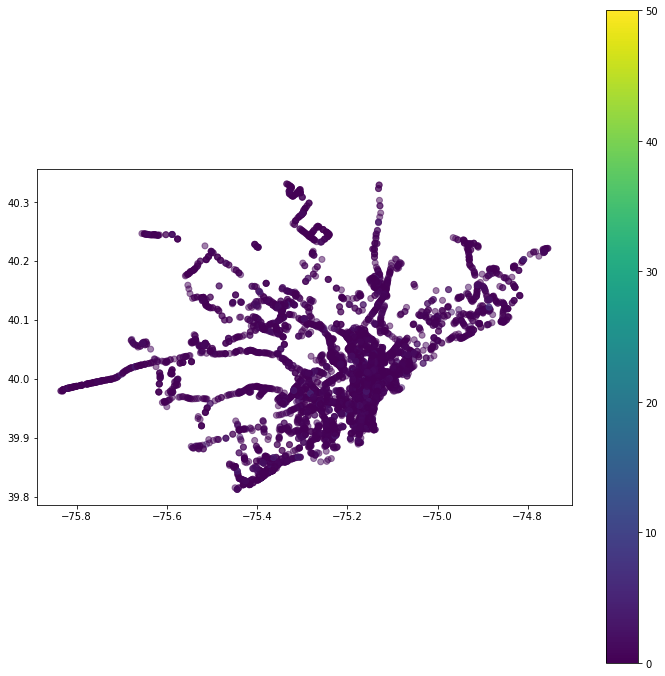

In [ ]:
allallnorthsub.plot(column="Avg. Ons",
                     figsize=(12, 12),
                     legend=True,
                     alpha=0.5,
                     marker='o')